In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../source/')
import numpy as np
from Users import Users
from Producers import *
from sklearn.preprocessing import normalize
from plotting import *
from tqdm import tqdm
import pandas as pd

In [3]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 15,                   # Set font size to 11pt
    'axes.labelsize': 15,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})

In [4]:
utils = ['avg_prod_util', 'avg_user_util']

In [5]:
nprodlist = [5,10,50]
nprod = 50

In [6]:
def df_agg_utils(df, temp:int): # also in src/plotting.py
  '''
    average across seeds

    Returns 
    df_agg has columns: dimension, nprod, avg_prod_util_mean, avg_prod_util_sem, avg_user_util_mean, avg_user_util_sem
  '''
  groups = ['dimension', 'nprod'] # groupby columns, averages out across seeds
  cols = groups + ['avg_prod_util', 'avg_user_util']
  df = df[df['NE_exists'] == True][cols]
  df_agg = df.groupby(groups).agg(['mean', 'sem']) # iters_to_NE will get mean, standard error of mean; we group by dimensions, num_prod
  df_agg.columns = df_agg.columns.map("_".join) # this is just to flatten multi column iters_to_NE mean and SEM
  df_agg.reset_index(inplace=True)
  df_agg['temp'] = temp # add a column for temperatur
  return df_agg

## Amzn music

In [7]:
df_100 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/amznmusic_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/amznmusic_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(4, 0, 0, 0, 0, 0)

In [8]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

In [9]:
df_1.iloc[0]

dimension                                                               5
emb_seed                                                               13
nprod                                                                   2
NE_exists                                                            True
iters                                                                   2
last_profile_compact                            [1.0, 0.0, 1.0, 0.0, 0.0]
producer_dist                                   [0.5, 0.0, 0.5, 0.0, 0.0]
user_dist               [0.2002329859412999, 0.19997920860795576, 0.20...
total_prod_util                                             147638.100639
avg_prod_util                                                73819.050319
max_prod_util                                                73848.445047
min_prod_util                                                73789.655591
total_user_util                                             147638.100639
avg_user_util                         

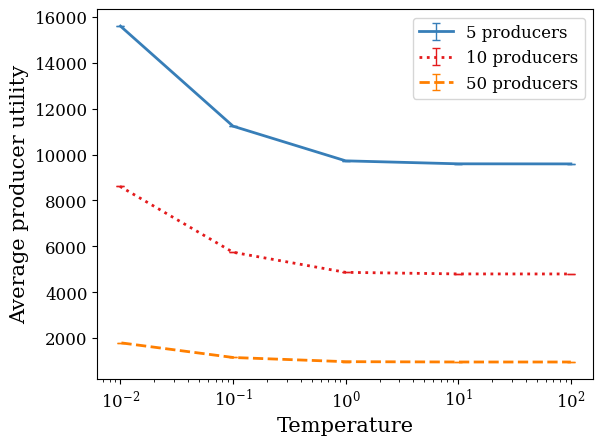

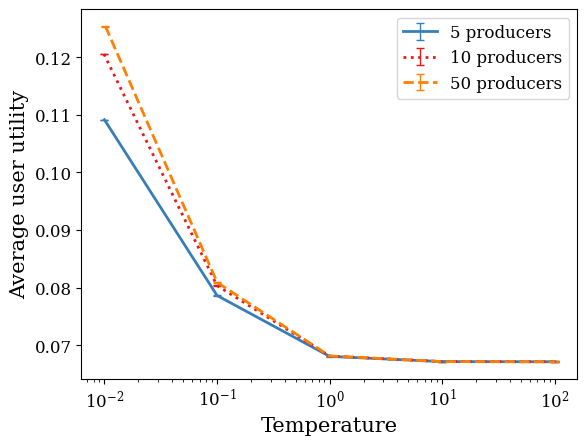

In [10]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/amznmusic_')

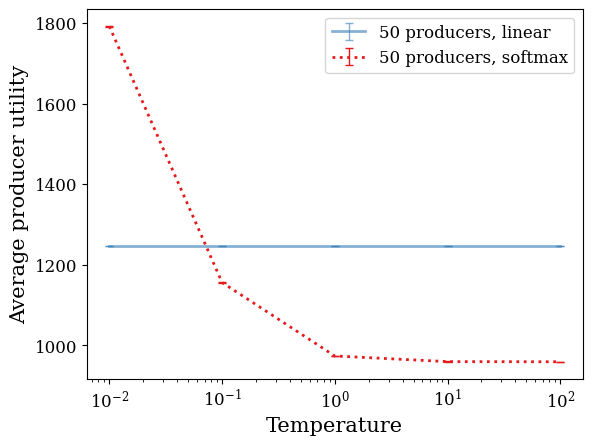

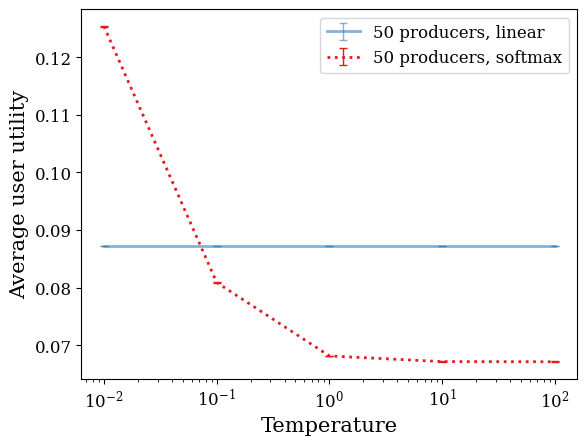

In [11]:
plot_utils_tempvar_prodcurves_linvssm(dict_df, df_linear, [nprod], '../plots/util-temps-nprodcurves/amznmusic_linvssm_')

In [12]:
# plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/amznmusic_')

## Rentrunway

In [13]:
df_100 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/rentrunway_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(3, 0, 0, 0, 0, 0)

In [14]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

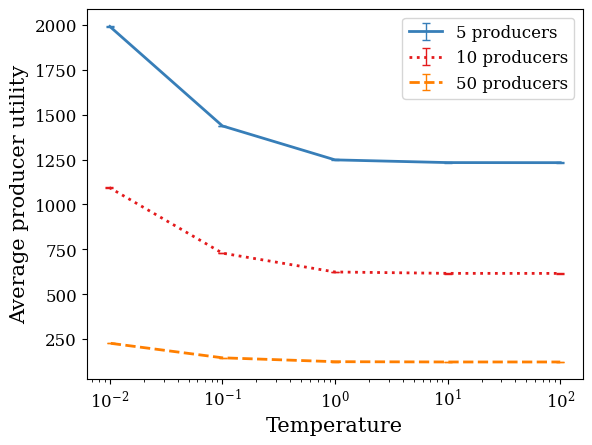

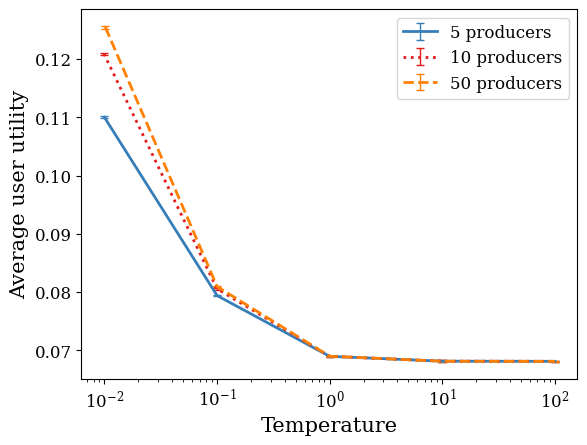

In [15]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/rentrunway_')

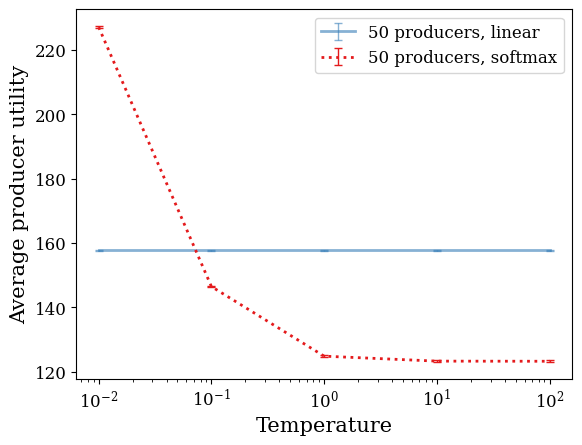

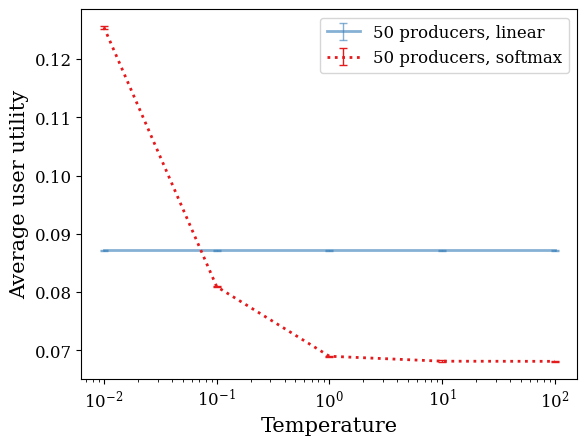

In [16]:
plot_utils_tempvar_prodcurves_linvssm(dict_df, df_linear, [nprod], '../plots/util-temps-nprodcurves/rentrunway_linvssm_')

In [17]:
# plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/rentrunway_')

## Movielens-100k

In [18]:
df_100 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/movielens-100k_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(7, 0, 0, 0, 0, 0)

In [19]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

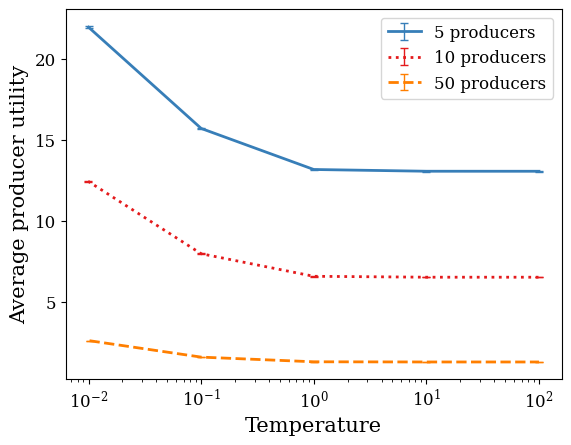

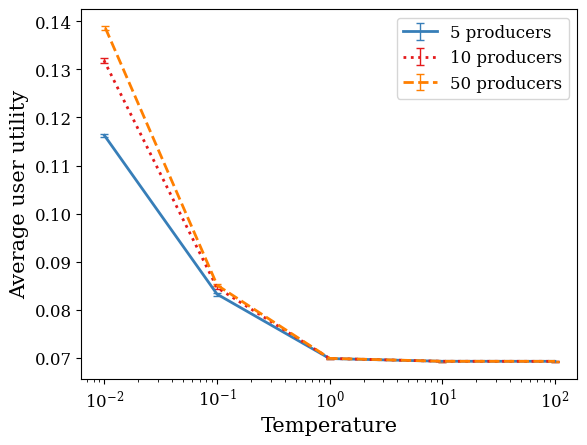

In [20]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/ml100k_')

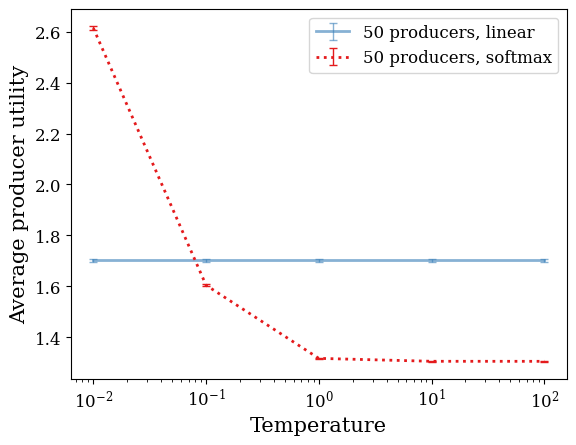

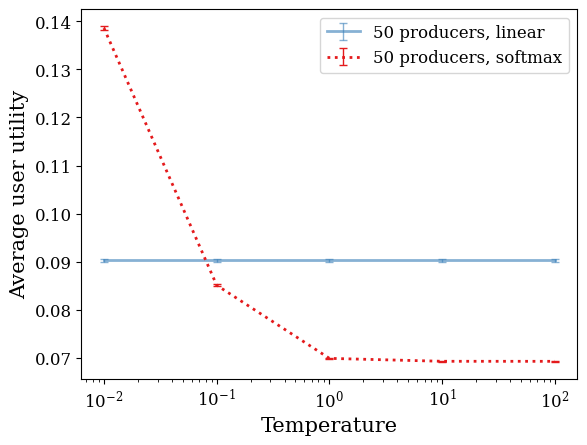

In [21]:
plot_utils_tempvar_prodcurves_linvssm(dict_df, df_linear, [nprod], '../plots/util-temps-nprodcurves/ml100k_linvssm_')

In [22]:
# plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/ml100k_')

## Synth uniform

In [23]:
df_100 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/synth-uniform_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(8, 0, 0, 0, 0, 1)

In [24]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

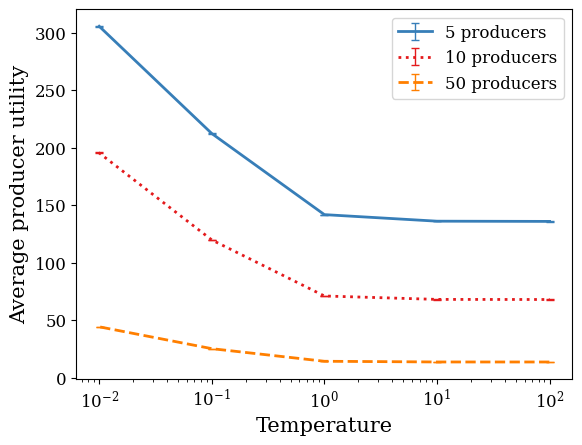

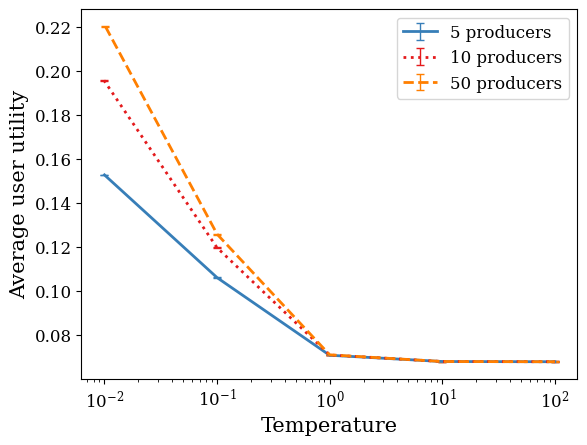

In [25]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/synthuniform_')

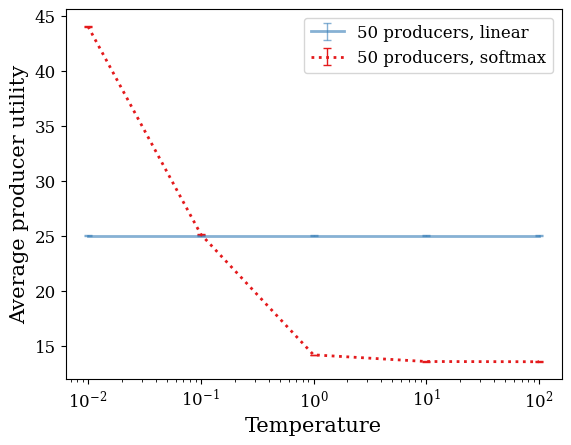

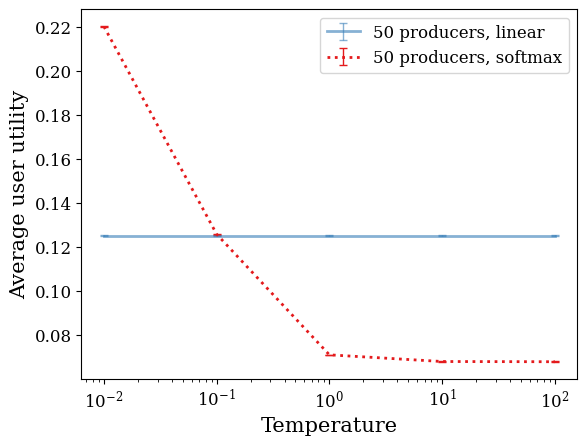

In [26]:
plot_utils_tempvar_prodcurves_linvssm(dict_df, df_linear, [nprod], '../plots/util-temps-nprodcurves/synthuniform_linvssm_')

In [27]:
# plot_utils_tempvar_dimcurves__errbar(dict_df, '../plots/util-temps-ndimcurves/synthuniform_')

## Synth skewed

In [28]:
df_100 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/synth-skewed_linear_temp_1.0/concseeds5.pkl")

(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(0, 0, 0, 0, 0, 0)

In [29]:
dict_df = {}
dict_df[100] = df_100
dict_df[10] = df_10
dict_df[1] = df_1
dict_df[0.1] = df_01
dict_df[0.01] = df_001

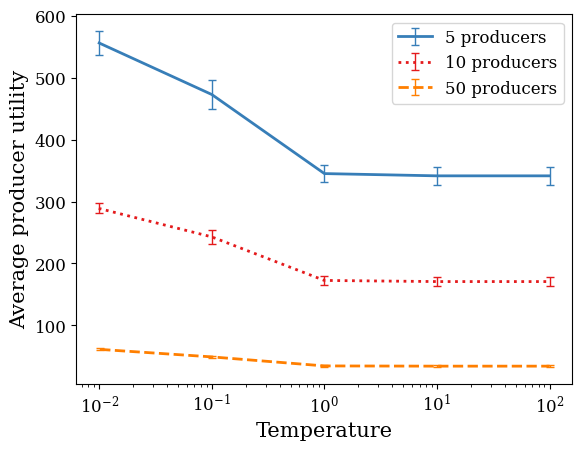

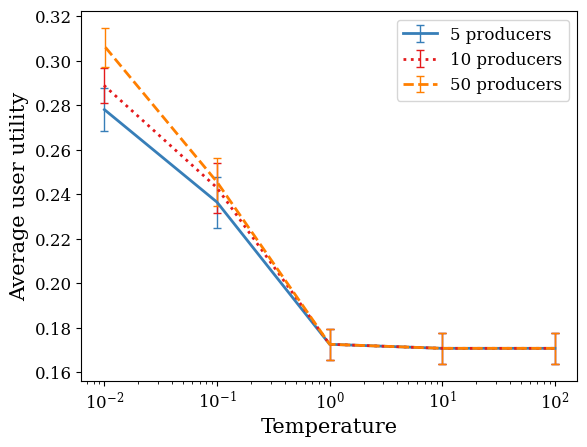

In [30]:
plot_utils_tempvar_prodcurves__errbar(dict_df, df_linear, nprodlist, '../plots/util-temps-nprodcurves/synthskewed_')

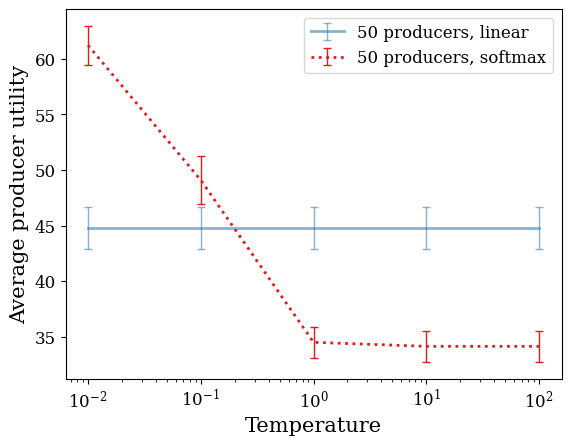

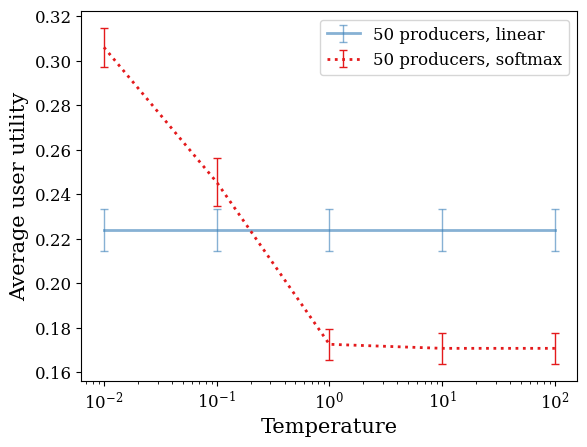

In [31]:
plot_utils_tempvar_prodcurves_linvssm(dict_df, df_linear, [nprod], '../plots/util-temps-nprodcurves/synthskewed_linvssm_')